In [26]:

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates# isso é para que matplot lib use o tipo mdates

import pandas as pd
import pandas_datareader.data as web

!pip install --upgrade mplfinance
#candlestick_ohlc
import mplfinance as mpf


Requirement already up-to-date: mplfinance in /usr/local/lib/python3.6/dist-packages (0.12.6a3)


In [2]:
style.use('ggplot')# é so um estilo p melhorar o grafico
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [3]:
df = web.DataReader('TSLA','yahoo', start, end)#o que voce quer e de onde voce quer retirar

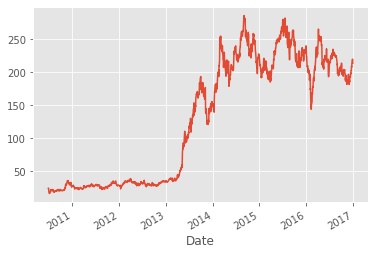

In [13]:
df['Adj Close'].plot()

df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()# min_periods é para q os primeiro 100 que seriam nan virem o valor em si

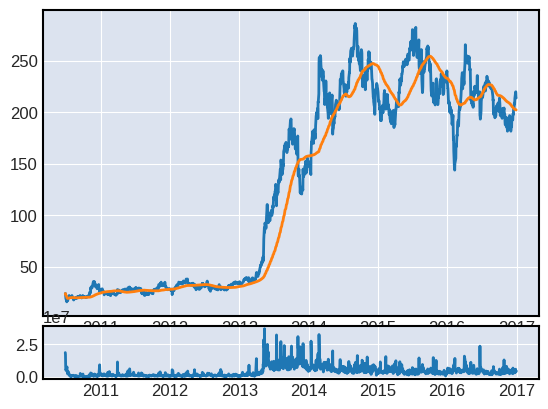

In [49]:
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)# 6 linhas 1coluna, começa 0,0 
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex =ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.plot(df.index, df['Volume'])

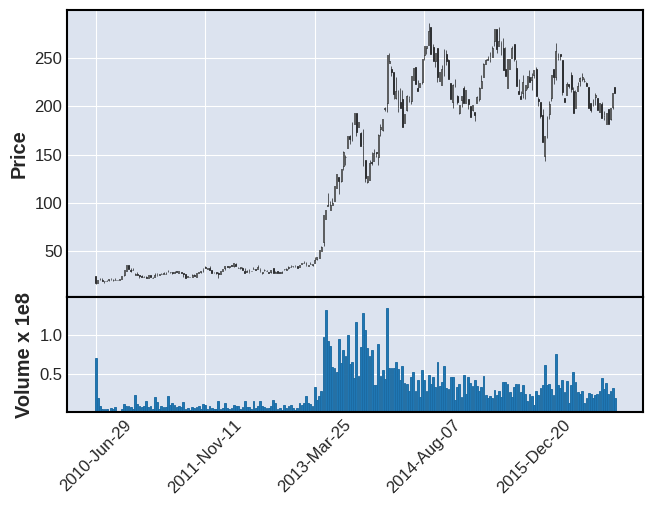

In [48]:
#resenple the date
df_ohlc = df['Adj Close'].resample('10D').ohlc()#vc pode fazer 10d,3Min... pode mean(), sum() #o ohlc vai te mostrar o open, high, low e close dos 10 dias
df_ohlc['volume'] = df['Volume'].resample('10D').sum()#vc pode fazer 10d,3Min... pode mean(), sum()

df_ohlc

#df_ohlc.reset_index(inplace=True)
#df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num) #mudando a data para um numero
df_ohlc

#ax1.xaxis_date()
mpf.plot(df_ohlc,type='candle',volume=True)